In [ ]:
# default_exp model.train

# Train 

> API details.

In [ ]:
#hide
from nbdev.showdoc import *
import matplotlib.pyplot as plt

In [ ]:
#export
import os

import numpy as np
import tensorflow as tf

In [ ]:
path_inputs = '../data/processed/input.npy'
path_targets = '../data/processed/target.npy'

In [ ]:
inputs = np.load(path_inputs)
targets = np.load(path_targets)

inputs.shape, targets.shape

((1, 100, 100, 7), (1, 100, 100, 1))

In [ ]:
targets_scaled = targets*1e4

In [ ]:
kernel_size = (11,11)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size, padding='same', activation='relu', input_shape=(100, 100, 7)),
    tf.keras.layers.Conv2D(32, kernel_size, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(32, kernel_size, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(16, kernel_size, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(1, kernel_size, padding='same', activation='linear'),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 16)      13568     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 32)      61984     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 64)      247872    
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 100, 100, 32)      247840    
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 100, 100, 16)      61968     
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 100, 100, 1)       1937      
Total params: 635,169
Trainable params: 635,169
Non-trainable params: 0
________________________________________________

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-3)

model.compile(loss='mae', optimizer=optimizer)

In [ ]:
tf.keras.backend.set_value(model.optimizer.lr, 1e-4)

In [ ]:
model.fit(inputs, targets_scaled, epochs=500)

9
Epoch 252/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 253/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 254/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 255/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 256/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 257/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0368
Epoch 258/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 259/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 260/500
1/1 [==============================] - 0s 999us/step - loss: 0.0368
Epoch 261/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 262/500
1/1 [==============================] - 0s 1000us/step - loss: 0.0367
Epoch 263/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0367
Epoch 264/500
1/1 [===========

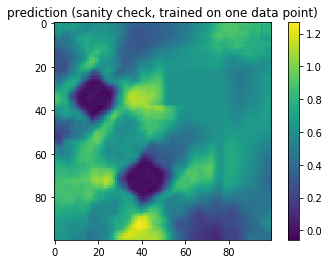

In [ ]:
import matplotlib.pyplot as plt

preds = model.predict(inputs)

plt.figure()
plt.imshow(np.squeeze(preds))
plt.title('prediction (sanity check, trained on one data point)')
plt.colorbar();

In [ ]:
preds.max()

0.8185672

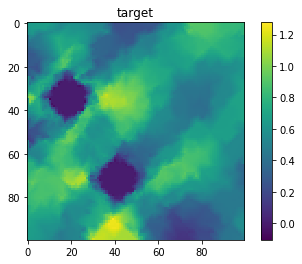

In [ ]:
plt.figure()
plt.imshow(np.squeeze(targets_scaled))
plt.title('target')
plt.colorbar();

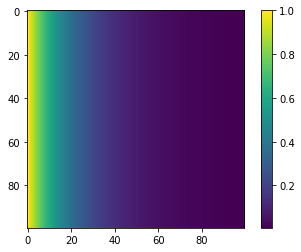

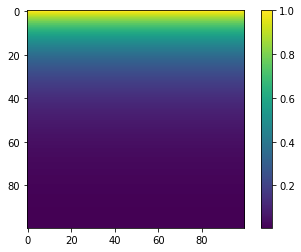

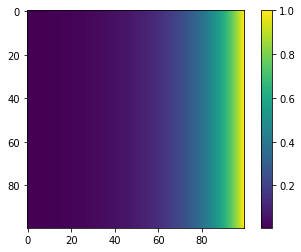

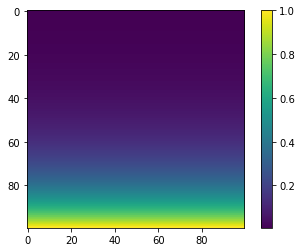

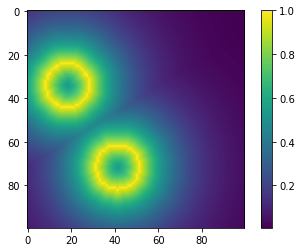

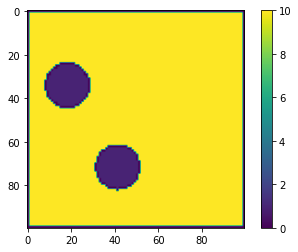

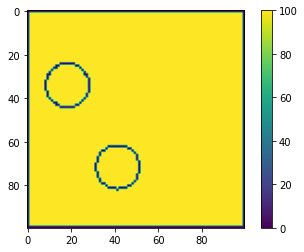

In [ ]:
for i in range(7):
    plt.figure()
    plt.imshow(np.squeeze(np.squeeze(inputs)[:, :, i]))
    plt.colorbar();


In [ ]:
inputs.max()

100.0